In [58]:
## Dependencies
from NanTex_backend.data_postprocessing.oneiros import Oneiros

### Overview
``` Python
# Dreamer
# Dreamer = Oneiros(num_features = 3,               # Number of features in the dataset
#                   DEBUG=True,                     # Debug mode <- leave on for the first run
#                   data_paths_in = None,           # Path to the input data <- in MS Windows, a "None" will trigger a file dialog
#                   data_path_out = None,           # Path to the output data <- in MS Windows, a "None" will trigger a file dialog when you need to save the data
#                   mode = 'has_ground_truth')      # Mode of the data processing <- choose dependent on the data you are about to load in


# Dreamer WINODWS
# -> Dreamer.from_explorer() - this function will call the file explorer dialog to choose the input and output files

## There are two convenience functions that we will use in this notebook:
# - Dreamer.with_ground_truth() - this function will call "from_exploer" with the mode set to "has_ground_truth"
# - Dreamer.without_ground_truth() - this function will call "from_exploer" with the mode set to "no_ground_truth"

# You need to provide the number of present features and if you want to run it in DEBUG morde or not.
# In windows, you can conveniently choose multiple files using the file explorere dialog. 

# Dreamer LINUX
# -> Dreamer.from_glob() - this function will take a number of paths or glob patterns as input and load the data from the files
# Dreamer.from_glob(*['path/to/file1', 'path/to/file2', 'path/to/file3']) - this will load the data from the files
# You sill need to provide the number of present features and if you want to run it in DEBUG morde or not.
```

### Data
Oneiros can read both .npy and image (png, jpeg, jpg) files. If you want to call the Dreamer with ground truth, you need to provide the data as npy files. If you want to call the Dreamer without ground truth, you can provide the data as images. The npy should have the following shape (number_of_features + 1, y_size, x_size). The shape will match if you use the other packages provided within the NanTex project.

### Metaparameters
#### We will use the following metaparameters to run the Dreamer.
``` Json
"feature_static_threshodls" : {     # Static thresholds for each feature
    "feature_0": 0.1,               # Threshold for feature 0
    "feature_1": 0.1,               # Threshold for feature 1
    "feature_2": 0.1                # Threshold for feature 2 <- if you have more features, add them here
    },
"dynamic_thresholds": {             # Dynamic thresholds for each feature <- generates histogram and determins the main population of pixel values. 
                                    # For SMLM this usually is the background and some noise. Be careful using this with images that have a lot of signal.
    "auto_calculate": True,         # Automatically calculate dynamic thresholds using multiples of the standard deviation
    "upper": 3,                     # Upper threshold for dynamic threshold calculation <- hist argmax + 3 bins
    "lower": -2,                    # Lower threshold for dynamic threshold calculation <- hist argmax - 2 bins
    "std_factor": 2                 # Factor to multiply the standard deviation by < hist argmax +- std_factor * std
    },
"patch_size": (256, 256),           # Size of the patches to be extracted from the images
"dream_memory_shape" : None,        # Shape of the memory array for the DREAM algorithm <- will be autmatically populated
"patch_array_shape": None,          # Shape of the patch array <- will be automatically populated
"standardize": True,                # Standardize the patches
"normalize": False,                 # Normalize the patches <- not recommended
"tensortype": torch.float32,        # Type of tensor to be used
"out_type": np.uint8,               # Determine the type of the output tensor <- usually np.uint8
"weights_only": True,               # DEBUG parameter when loading a state_dict (torch) <- leave as it
"cast_all_to_img": True,            # Cast all tensors to images will normalize the output and cast it to the maximum range of the output type
"append_original_features": True,   # Append the original features to the output tensor <- for your convenience when exporting
"append_original_overlays": True,   # Append the original overlays to the output tensor
"append_dream_overlays": True,      # Append the dream overlays to the output tensor
"apply_static_thresholds": True,    # Apply the static thresholds to dream features 
"apply_dynamic_thresholds": True    # Apply the dynamic thresholds to dream features
```

#### The metaparameters are stored in a dictionary and can be accessed and changed using the following code:
``` Python
# Access the metaparameters
metaparameters = Dreamer.metaparameters

# Change the metaparameters
metaparameters['patch_size'] = (256, 256)

# Update the metaparameters
new_metaparameters = {
    'patch_size': (256, 256),
    'some_other_metaparameter': 'some_value'                    
                     }
Dreamer.metaparameters.update(new_metaparameters)
```


# LINUX

In [ ]:
# Grab filepaths
from glob import glob

root: str = "path/to/your/data"
paths: list = glob(root + "/*.npy")
paths = paths[:10]  # <- for testing purposes

In [ ]:
# set up the dreamer for LINUX
Dreamer = Oneiros.from_glob(
    *paths, num_features=2, num_channels_out=3, DEBUG=True, mode="has_ground_truth"
)

In [ ]:
# load the model
Dreamer.jumpstart_model(state_dict_path="path/to/model.pt")

In [ ]:
# if you want to load in more data without reinitializing the model
Dreamer.load_new_data_linux("path/to/new/data_1.npy", "path/to/new/data_2.npy", ...)

In [ ]:
Dreamer.dream()  # <- this will start the data processing

In [ ]:
# Visualize the first dream

# stylesheet
from NanTex_backend.Util.pltStyler import pltStyler

pltStyler().enforece_stylesheet()

Dreamer.visualize(
    dream_no=5,  # <- dream number to visualize
    cmap="inferno",  # <- colormap to use, defaults to 'gray
    ticks=False,  # <- on/off ticks
    return_fig_axs=False,
)  # <- return fig and axs objects

In [ ]:
# Export your results
# npy will export each dream to a 4D tensor
# png will export each dream to a folder of pngs

Dreamer.export(
    out_type="png",  # <- output type, choose from 'png' or 'npy' or implement your own
    outpath=".",
)  # <- output path

# Windows

## With Ground Truth

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from NanTex_backend.Util.pyDialogue import pyDialogue as pyD

files = pyD.askFILES()
files = [file for i in range(5) for file in files if f"({i},0,0_(0,0)" in file]
files = [np.load(file) for file in files]
fig, axs = plt.subplots(1, len(files), figsize=(len(files) * 5, 5))
for i, ax in enumerate(axs):
    ax.imshow(files[i][0, ...])

In [3]:
# set up the dreamer
Dreamer = Oneiros.with_ground_truth(num_features=3, num_channels_out=3, DEBUG=True)

Loading data...


Loading data...:   0%|          | 0/5 [00:00<?, ?it/s]

Loading npy data from P:/WÜRZBURG_2025_DATA/test_data_aug25/3_feature_rotation_(0, 0, 0, 0, 0, 0).npy...
Loading npy data from P:/WÜRZBURG_2025_DATA/test_data_aug25/3_feature_rotation_(0, 0, 0, 0, 0, 1).npy...
Loading npy data from P:/WÜRZBURG_2025_DATA/test_data_aug25/3_feature_rotation_(0, 0, 0, 0, 0, 2).npy...
Loading npy data from P:/WÜRZBURG_2025_DATA/test_data_aug25/3_feature_rotation_(0, 0, 0, 0, 0, 3).npy...
Loading npy data from P:/WÜRZBURG_2025_DATA/test_data_aug25/3_feature_rotation_(0, 0, 0, 0, 1, 0).npy...
Setting up metadata...
VERBOSE mode is ON
DEBUG mode is ON
Oneiros Initialized...


In [60]:
# set up the dreamer
Dreamer = Oneiros.random_selection_with_ground_truth(
    num_selection=5, num_features=3, num_channels_out=3, DEBUG=True
)

You are using an experimental mode meant for research purposes.
Please be aware that this mode may not be fully stable and that the results you obtain may vary.
Randomly selecting 5 samples with ground truth...
Loading data...


Loading data...:   0%|          | 0/5 [00:00<?, ?it/s]

Loading npy data from P:/WÜRZBURG_2025_DATA/test_data_aug25/ImMIX_POST_ER-MIC-CLT_(0,4,0_(2,1)_max(635.0))_rearranged_aug25.npy...
Loading npy data from P:/WÜRZBURG_2025_DATA/test_data_aug25/ImMIX_POST_ER-MIC-CLT_(0,3,1_(2,2)_max(583.0))_rearranged_aug25.npy...
Loading npy data from P:/WÜRZBURG_2025_DATA/test_data_aug25/ImMIX_POST_ER-MIC-CLT_(2,1,0_(2,2)_max(622.0))_rearranged_aug25.npy...
Loading npy data from P:/WÜRZBURG_2025_DATA/test_data_aug25/ImMIX_POST_ER-MIC-CLT_(0,0,0_(1,3)_max(561.0))_rearranged_aug25.npy...
Loading npy data from P:/WÜRZBURG_2025_DATA/test_data_aug25/ImMIX_POST_ER-MIC-CLT_(2,4,1_(3,3)_max(611.0))_rearranged_aug25.npy...
Setting up metadata...
VERBOSE mode is ON
DEBUG mode is ON
Oneiros Initialized...


In [61]:
import numpy as np

## reoder old version
for k, v in Dreamer.data_in.items():
    Dreamer.data_in[k] = np.stack([v[1], v[2], v[3], v[0]])

In [4]:
# set debug mode
Dreamer.DEBUG = True

In [96]:
# Quickstart model
# Just choose the torch checkpoint file and the model will be loaded
Dreamer.jumpstart_model()

Quickstarting model...
Checking path...
Setting up model...
Fetching weights...
Checking path...
Setting up model...


In [84]:
## load new data without reloading the model
Dreamer.load_new_data_windows()

Calling new input data...
Resetting Oneiros...
Loading data...


Loading data...:   0%|          | 0/1 [00:00<?, ?it/s]

Loading npy data from P:/WÜRZBURG_2025_DATA/train_data_aug25/ImMIX_POST_ER-MIC-CLT_(0,0,0_(2,0)_max(543.0))_rearranged_aug25.npy...
New data retrieved...
Please call the dream method to process the data.


In [88]:
# change patchsize
Dreamer.metadata["patch_size"] = (256, 256)
Dreamer.metadata['normalize'] = False
Dreamer.metadata['standardize'] = True

In [7]:
Dreamer.metadata

{'feature_static_thresholds': {'feature_0': 0.1,
  'feature_1': 0.1,
  'feature_2': 0.1},
 'dynamic_thresholds': {'auto_calculate': True,
  'upper': 3,
  'lower': -2,
  'std_factor': 2},
 'patch_size': (512, 512),
 'dream_memory_shape': None,
 'dream_dtype': numpy.float32,
 'patch_array_shape': None,
 'standardize': True,
 'normalize': True,
 'tensortype': torch.float32,
 'out_type': numpy.uint8,
 'weights_only': True,
 'cast_all_to_img': True,
 'append_original_features': True,
 'append_original_overlays': True,
 'append_dream_overlays': True,
 'apply_static_thresholds': True,
 'apply_dynamic_thresholds': True}

In [64]:
Dreamer.VERBOSE = True
Dreamer.DEBUG = True
Dreamer.FREEMEMORY = False

In [76]:
Dreamer.__run_checks__()

Running checks...
Checking model...
Checking data...
Checking data...
Checking dream memory...
Checking patch shape...
Checking number of features...
Error: 
Error: 


In [93]:
Dreamer.dream()

Going to bed...
Pre-processing data...
Checking ground truth...
Checking channel padding...
Mode: 'has_ground_truth'
No mismatch between the number of ground truth images and feature channels detected.
Continuing with provided channels...
Adjusting image size...
Stripping images...
Standardizing images...
Memorizing patch array shape...
Patchifying images...
Reshaping images...
Memorizing dream shape...
Offloading data...
Running checks...
Checking model...
Checking data...
Checking data...
Checking dream memory...
Checking patch shape...
Checking number of features...
Error: 
Error: 
Passing out...


Dreaming of nature...:   0%|          | 0/1 [00:00<?, ?it/s]

Dream_0...:   0%|          | 0/225 [00:00<?, ?it/s]

Waking up...
Wrapping up dreams...
Unpatchifying images...
Applying thresholds...
Appending data...
Appending original overlays...
Appending original features...
Appending dreams...
Casting to image...


In [11]:
## Get an overview of the metaparameters
from pprint import pprint

pprint(Dreamer.metadata)

{'append_dream_overlays': True,
 'append_original_features': True,
 'append_original_overlays': True,
 'apply_dynamic_thresholds': True,
 'apply_static_thresholds': True,
 'cast_all_to_img': True,
 'dream_dtype': <class 'numpy.float32'>,
 'dream_memory_shape': {'dream_0': (49, 3, 512, 512),
                        'dream_1': (49, 3, 512, 512),
                        'dream_2': (49, 3, 512, 512),
                        'dream_3': (49, 3, 512, 512),
                        'dream_4': (49, 3, 512, 512)},
 'dynamic_thresholds': {'auto_calculate': True,
                        'lower': -2,
                        'std_factor': 2,
                        'upper': 3},
 'feature_static_thresholds': {'feature_0': 0.1,
                               'feature_1': 0.1,
                               'feature_2': 0.1},
 'normalize': True,
 'out_type': <class 'numpy.uint8'>,
 'patch_array_shape': {'dream_0': (7, 7),
                       'dream_1': (7, 7),
                       'dream_2': (7, 7)

In [11]:
## Export the results
Dreamer.export(
    out_type="single_npy"
)  # png <- image, npy <- numpy array, if you want more, you need to implement it

In [89]:
## Play with the static thresholds to delete background noise
Dreamer.metadata["feature_static_thresholds"].update(
    {
        "feature_0": 0.0,
        "feature_1": 0.0,
        "feature_2": 0.0,
    }
)
# Play with the dynamic thresholds to  delete structural noise
Dreamer.metadata["dynamic_thresholds"].update(
    {"auto_calculate": True, "upper": 3, "lower": -2, "std_factor": 3}
)


# Play with the dreamer parameters
Dreamer.metadata["apply_dynamic_thresholds"] = False
Dreamer.metadata["apply_static_thresholds"] = False

# choose what extras to export
Dreamer.metadata["append_dream_overlays"] = True
Dreamer.metadata["append_original_overlays"] = True
Dreamer.metadata["append_original_features"] = True

Dreamer.metadata["cast_all_to_img"] = (
    True  # if you dont want to export straight to image
)

# however, you have to re-run the post-processing
Dreamer.__post_process_data__()

Wrapping up dreams...
Unpatchifying images...
Applying thresholds...
Appending data...
Appending original overlays...
Appending original features...
Appending dreams...
Casting to image...


In [14]:
(4000 - 512) //2

1744

In [25]:
(4000 - 512) //2 + (4000 - 512) //2 + 512

4000

In [95]:
Dreamer.model

Sequential(
  (0): UNet(
    (l_conv): ModuleList(
      (0): ConvPass(
        (conv_pass): Sequential(
          (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(np.int64(1), np.int64(1)))
          (1): ReLU()
          (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(np.int64(1), np.int64(1)))
          (4): ReLU()
          (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (1): ConvPass(
        (conv_pass): Sequential(
          (0): Conv2d(32, 96, kernel_size=(3, 3), stride=(1, 1), padding=(np.int64(1), np.int64(1)))
          (1): ReLU()
          (2): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (3): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(np.int64(1), np.int64(1)))
          (4): ReLU()
          (5): BatchNorm2d(96, eps=1e-05, momen

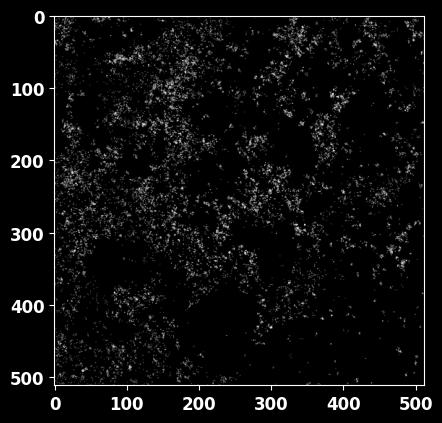

[-0.03768902 -0.03523787 -0.03428058 ...  0.15812504  0.15817177
  0.16001311]


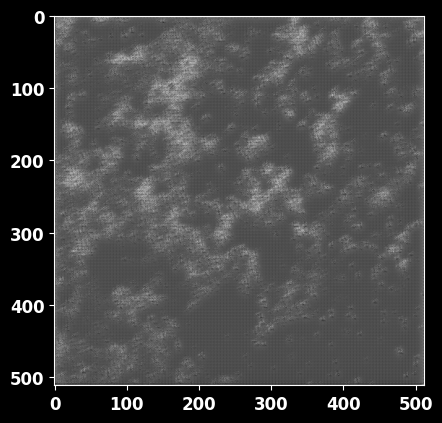

In [56]:
import torch
import matplotlib.pyplot as plt
def normalize(arr):
    return (arr - arr.min()) / (arr.max() - arr.min())

def denormalize(arr, original_min, original_max):
    return arr * (original_max - original_min) + original_min

def standardize(arr):
    return (arr - arr.mean()) / arr.std()

plt.imshow(Dreamer.data_in['dream_1'][-1, (3584 - 512) //2 : -(3584 - 512) //2, (3584 - 512) //2 : -(3584 - 512) //2], cmap='gray')
plt.show()

tensor = torch.from_numpy(normalize(Dreamer.data_in['dream_1'][-1, (3584 - 512) //2 : -(3584 - 512) //2, (3584 - 512) //2 : -(3584 - 512) //2]).astype(np.float32))
tensor = tensor[None, ...]  # add batch dimension
tensor = tensor[None, ...]  # add channel dimension
tensor = tensor.to(Dreamer.device)

out = Dreamer.model(tensor).cpu().detach().numpy()
print(np.unique(out))
plt.imshow(denormalize(out[0, 0, ...], 0, 255), cmap='gray')
plt.show()

Visualizing data...
Checking data...


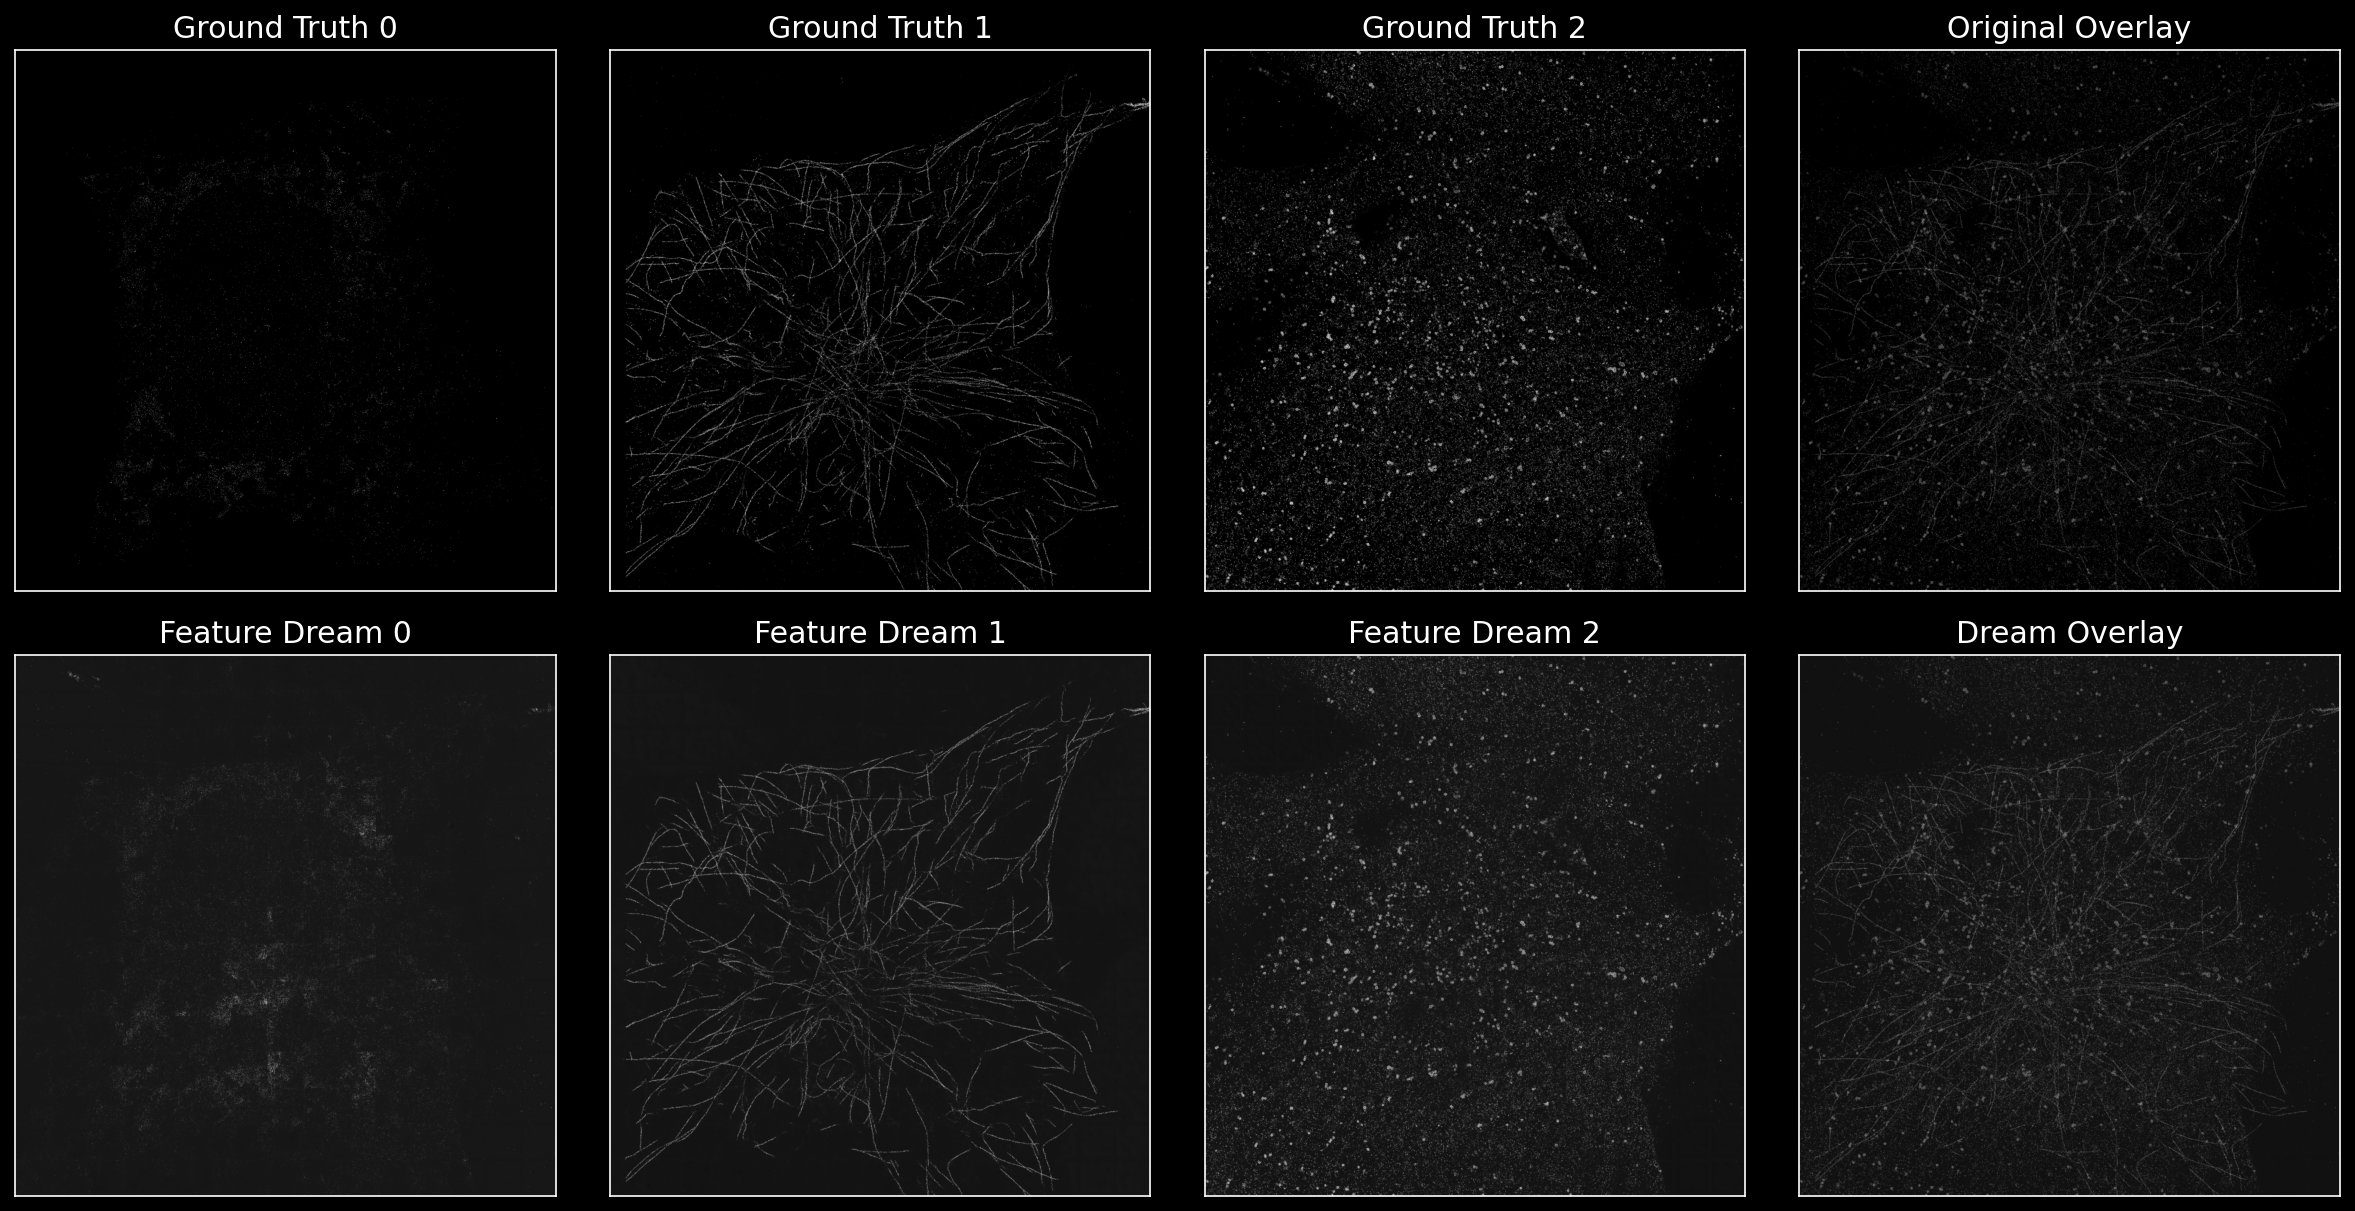

In [94]:
## Plot and vsualize the results
from NanTex_backend.Util.pltStyler import pltStyler

pltStyler().enforece_stylesheet()
Dreamer.visualize(dream_no=0, return_fig_axs=False)

In [ ]:
from NanTex_backend.Util.pyDialogue import pyDialogue as pyD

file = pyD.askFILE()
file = np.load(file)

# plot predictions and features
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(3):
    axs[0, i].imshow(file[..., i], cmap="gray")
    axs[0, i].set_title(f"Feature {i}")
    axs[0, i].axis("off")

    axs[1, i].imshow(file[..., i + 3], cmap="gray")
    axs[1, i].set_title(f"Prediction {i}")
    axs[1, i].axis("off")

In [ ]:
## Export the results
Dreamer.export(
    out_type="png"
)  # png <- image, npy <- numpy array, if you want m0re, you need to implement it

## Without Ground Truth

In [ ]:
# set up the dreamer
Dreamer = Oneiros.without_ground_truth(num_features=2, num_channels_out=2, DEBUG=True)

In [ ]:
Dreamer.jumpstart_model()

In [ ]:
Dreamer.load_new_data_windows()

In [ ]:
Dreamer.dream()

In [ ]:
from NanTex_backend.Util.pltStyler import pltStyler

pltStyler().enforece_stylesheet()
Dreamer.visualize(0, return_fig_axs=False, cmap="inferno")

In [ ]:
## Export the results
Dreamer.export(
    out_type="png"
)  # png <- image, npy <- numpy array, if you want mire, you need to implement it

## Deeper insights and step by step execution

In [ ]:
## Test Pre-Processing
Dreamer.__pre_process_data__()

In [ ]:
## Dependencies
from NanTex_backend.deep_learning.dl_model_assembly import (
    assembled_model,
    final_layer_config,
)

## Load model
Dreamer.setup_model(
    model=assembled_model["model"],
    activation=assembled_model["activation"],
    device=assembled_model["device"],
    state_dict_path=None,
)
Dreamer.load_weights(None)

In [ ]:
Dreamer.__offload_data_to_device__()

In [ ]:
Dreamer.metadata

In [ ]:
Dreamer.__go_to_sleep__()

In [ ]:
Dreamer.__post_process_data__()

In [ ]:
## Visualization
import numpy as np


def normalize(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))


# Dependencies
from NanTex_backend.Util.pltStyler import pltStyler
import matplotlib.pyplot as plt

# control
Select_Dream: int = 0

# layout
pltStyler().enforece_stylesheet()

# figure
fig, axs = plt.subplots(
    1,
    final_layer_config["out_channels"] + 1,
    figsize=(5 * (final_layer_config["out_channels"] + 1), 5),
)

# plot features
for i, key in enumerate(Dreamer.data_out[f"dream_{Select_Dream}"].keys()):
    if key in ["original_overlay", "dream_overlay"] + [
        f"original_feature_{i}" for i in range(1, 4)
    ]:
        continue

    axs[i].imshow(
        normalize(Dreamer.data_out[f"dream_{Select_Dream}"][key]) * 255, cmap="gray"
    )
    axs[i].set_title(f"{key}")
    axs[i].tick_params(
        axis="both",
        which="both",
        bottom=False,
        top=False,
        left=False,
        right=False,
        labelbottom=False,
        labelleft=False,
    )

# add original
axs[-1].imshow(
    normalize(Dreamer.data_out[f"dream_{Select_Dream}"]["original_overlay"]) * 255,
    cmap="gray",
)
axs[-1].set_title("Original")